In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

In [2]:
df = pd.read_csv("D:\datasets\TSLA.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


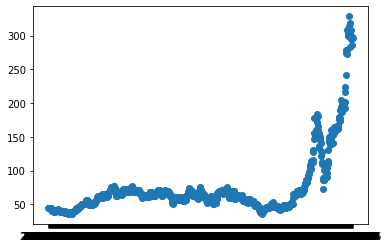

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["Date"][:1000], df["Close"][:1000])

In [7]:
df.Date[:1000]

0      2016-08-16
1      2016-08-17
2      2016-08-18
3      2016-08-19
4      2016-08-22
          ...    
995    2020-07-30
996    2020-07-31
997    2020-08-03
998    2020-08-04
999    2020-08-05
Name: Date, Length: 1000, dtype: object

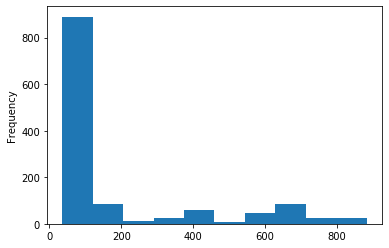

In [8]:
df.Close.plot.hist()

In [9]:
df.head().T

,0,1,2,3,4
Date,2016-08-16,2016-08-17,2016-08-18,2016-08-19,2016-08-22
Open,45.098,44.866,44.764,44.708,44.834
High,45.438,44.966,45.132,45.034,45.022
Low,44.682,44.56,44.458,44.506,44.536
Close,44.722,44.648,44.702,45,44.586
Adj Close,44.722,44.648,44.702,45,44.586
Volume,11335500,8935500,8572500,8297500,10327500


In [10]:
df.Date.dtype

dtype('O')

In [11]:
df = pd.read_csv("D:\datasets\TSLA.csv",
                low_memory=False,
                parse_dates=["Date"])

In [12]:
df["saleYear"] = df.Date.dt.year
df["saleMonth"] = df.Date.dt.month
df["saleDay"] = df.Date.dt.day
print(df[["saleYear","saleMonth","saleDay"]])

      saleYear  saleMonth  saleDay
0         2016          8       16
1         2016          8       17
2         2016          8       18
3         2016          8       19
4         2016          8       22
...        ...        ...      ...
1253      2021          8        9
1254      2021          8       10
1255      2021          8       11
1256      2021          8       12
1257      2021          8       13

[1258 rows x 3 columns]


In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,saleYear,saleMonth,saleDay
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500,2016,8,16
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500,2016,8,17
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500,2016,8,18
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500,2016,8,19
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500,2016,8,22


### Split the data into training, validation and testing sets

In [14]:
x = df[["saleDay","saleYear","saleMonth","Open"]]
y = df["Close"]
x.shape, y.shape

((1258, 4), (1258,))

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1006, 4), (1006,), (252, 4), (252,))

In [17]:
x_Train, x_val, y_Train, y_val = train_test_split(x_train,y_train,
                                                     test_size=0.15)

### Support Vector Machine.

In [18]:
from sklearn.svm import SVR

In [19]:
svr_linear = SVR(kernel="linear")
svr_linear.fit(x_Train,y_Train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
svr_linear_score = svr_linear.score(x_Train,y_Train)
svr_linear_score

0.9982904249962182

In [21]:
svr_linear.score(x_val,y_val)

0.9984749337734938

In [22]:
y_preds = svr_linear.predict(x_test)

In [23]:
y_preds

array([ 68.26672878,  46.14143064,  42.68021185,  38.23673908,
       447.27062121,  56.7359609 ,  49.36777167, 429.11594169,
       685.52755762, 414.75502332,  60.88678024, 453.27766725,
        67.33471452,  61.84559446, 429.73547922,  67.29644452,
       588.70299869,  45.67797398,  65.46385547, 280.25108546,
       254.68129197,  60.00035845,  73.22528613,  44.0308592 ,
       422.59139941,  47.99869218,  63.07645187,  70.93954162,
        54.13972657,  39.92912487, 449.1710078 ,  61.77531201,
       791.9469268 ,  87.45919374,  56.78046605,  65.00565178,
        60.4893153 ,  71.51747099,  71.49969688,  63.31490315,
       611.25413095,  60.46478402, 162.38953626,  53.75695795,
        69.51079886, 108.56799431,  73.19196371,  41.81066872,
        61.38928164,  82.59622081,  55.33946913,  70.74267373,
        71.11701377, 147.58309357,  65.45588403,  69.70107595,
        76.23431411,  62.25372697, 599.42939971,  62.66264659,
        59.20952433,  67.03725265,  58.39378821,  38.94

In [24]:
y_test

561      68.211998
101      45.973999
51       40.801998
63       36.290001
1073    486.640015
           ...    
156      55.584000
549      52.000000
398      64.269997
243      69.417999
834      67.905998
Name: Close, Length: 252, dtype: float64

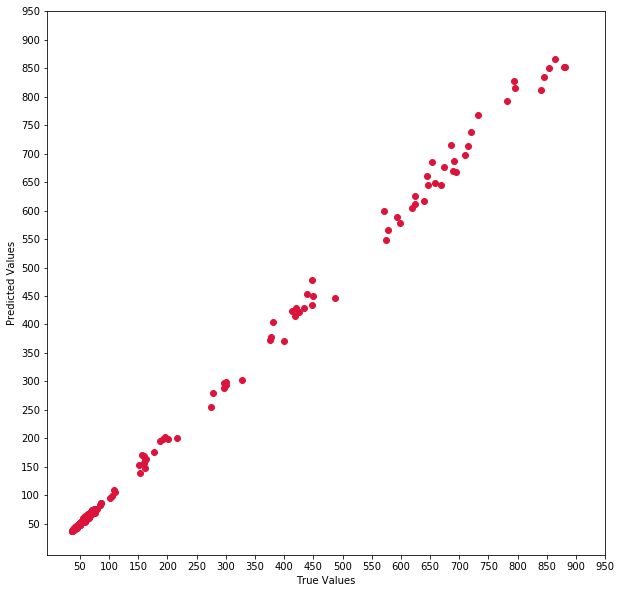

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_preds, c = "crimson")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.xticks(np.arange(50,1000,50))
plt.ylabel("Predicted Values")
plt.yticks(np.arange(50,1000,50));

In [50]:
from sklearn.metrics import mean_squared_error

In [53]:
mse = mean_squared_error(y_test,y_preds)
rmse = math.sqrt(mse)
rmse

8.864245421522394

### RandomForest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_jobs=-1,
                                 random_state = 42)

rfr_model.fit(x_Train,y_Train)

C:\Users\Kartik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [29]:
rfr_model.score(x_Train,y_Train)

0.999556868708981

In [56]:
rfr_model_score = rfr_model.score(x_val,y_val)
rfr_model_score

0.9980870899011087

In [31]:
y_preds_rfr = rfr_model.predict(x_test)

In [32]:
y_preds_rfr

array([ 68.9076005,  46.1599997,  42.2872003,  37.674001 , 451.2019898,
        56.0183995,  48.5952005, 426.220001 , 667.9839967, 414.3799959,
        59.6644006, 448.9659882,  67.2428002,  62.9721992, 431.2410001,
        68.8693999, 586.0470094,  45.4714009,  67.068598 , 280.5355899,
       261.9169925,  59.0716003,  72.4680006,  43.7315997, 421.0460083,
        47.8803995,  62.7286005,  70.2304007,  53.9118001,  40.1174013,
       452.9039888,  60.8335998, 801.0300048,  90.2603998,  56.3144002,
        65.9065987,  61.1146002,  70.0905989,  70.1429993,  63.1272004,
       620.4440062,  60.2248005, 163.4646027,  54.3935997,  69.6829995,
       105.6493981,  74.3004005,  41.1070008,  61.1944007,  82.1183974,
        55.1679997,  69.9277993,  69.9383994, 145.3602003,  65.303601 ,
        68.3188012,  75.6176001,  61.676401 , 607.4780152,  63.4402006,
        58.8160004,  67.0265984,  58.7325997,  37.6736005,  39.3766007,
       621.2260072, 843.8370058,  37.6996002,  54.4546002,  40.8

In [33]:
y_test

561      68.211998
101      45.973999
51       40.801998
63       36.290001
1073    486.640015
           ...    
156      55.584000
549      52.000000
398      64.269997
243      69.417999
834      67.905998
Name: Close, Length: 252, dtype: float64

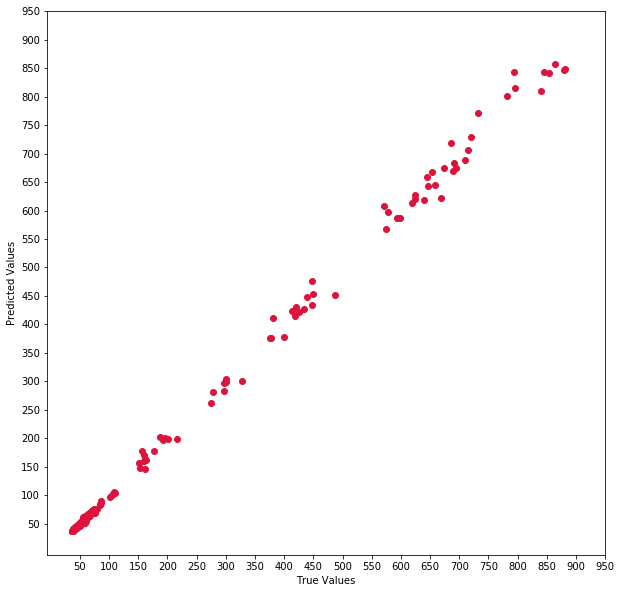

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_preds_rfr, c = "crimson")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.xticks(np.arange(50,1000,50))
plt.ylabel("Predicted Values")
plt.yticks(np.arange(50,1000,50));

In [54]:
mse_rfr = mean_squared_error(y_test,y_preds_rfr)
rmse_rfr = math.sqrt(mse)
rmse_rfr

8.864245421522394